ARCH & GARCH demo from: https://machinelearningmastery.com/develop-arch-and-garch-models-for-time-series-forecasting-in-python/

In [5]:
import numpy as np
import pandas as pd
import arch as ac
from random import gauss
from random import seed
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

DATA: Creation and allocation

In [23]:
# seed pseudorandom number generator
seed(1)
# create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]
# square the dataset
squared_data = pd.Series([x**2 for x in data]) 
# split into train/test
n_test = 10
train, test = data[:-n_test], data[-n_test:]

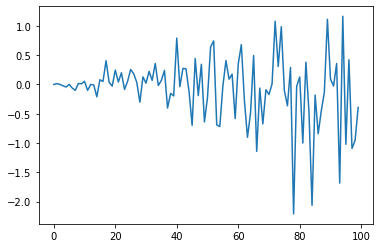

In [24]:
# plot
pyplot.plot(data)
pyplot.show()

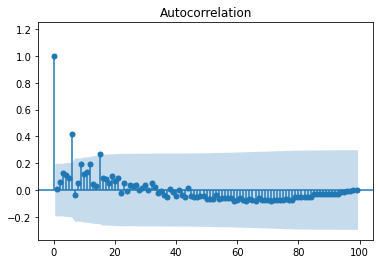

In [21]:
# create acf plot
ax = plot_acf(squared_data, auto_ylims=True, lags=99)
# ax.set_xlim([0,100])
pyplot.show()

ARCH Model

In [30]:
# define model
arch = ac.arch_model(train, mean="zero", vol="ARCH", p=15)
# fit model
arch_fit = arch.fit()
# forecast the test set
yhat_arch = arch_fit.forecast(horizon=n_test)

Iteration:      1,   Func. Count:     18,   Neg. LLF: 88214.15274343832
Iteration:      2,   Func. Count:     36,   Neg. LLF: 145.16327370105464
Iteration:      3,   Func. Count:     54,   Neg. LLF: 128.0887135967567
Iteration:      4,   Func. Count:     72,   Neg. LLF: 109.21731760967693
Iteration:      5,   Func. Count:     90,   Neg. LLF: 36.505726167454
Iteration:      6,   Func. Count:    108,   Neg. LLF: 39.65736210558854
Iteration:      7,   Func. Count:    126,   Neg. LLF: 28.719728253674663
Iteration:      8,   Func. Count:    143,   Neg. LLF: 28.02026266328528
Iteration:      9,   Func. Count:    161,   Neg. LLF: 34.947196664051255
Iteration:     10,   Func. Count:    180,   Neg. LLF: 30.036300450060104
Iteration:     11,   Func. Count:    198,   Neg. LLF: 26.916781932894732
Iteration:     12,   Func. Count:    216,   Neg. LLF: 35.23299744647749
Iteration:     13,   Func. Count:    235,   Neg. LLF: 25.557794001217236
Iteration:     14,   Func. Count:    253,   Neg. LLF: 25.49

c:\Users\Keegan\anaconda3\envs\ml\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

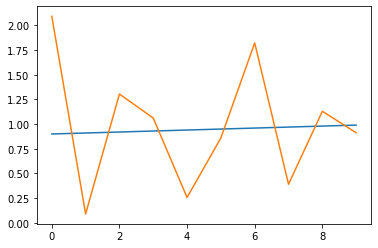

In [31]:
# plot actual variance
var = [i*0.01 for i in range(0,100)]
pyplot.plot(var[-n_test:])
# plot forecast variance
pyplot.plot(yhat_arch.variance.values[-1,:])
pyplot.show

GARCH Model

In [32]:
# define model
garch = ac.arch_model(train, mean = "Zero", vol = "GARCH", p = 15, q = 15)
garch_fit = garch.fit()
yhat_garch = garch_fit.forecast(horizon=n_test)

Iteration:      1,   Func. Count:     33,   Neg. LLF: 134.2317665883839
Iteration:      2,   Func. Count:     70,   Neg. LLF: 95088.3398100521
Iteration:      3,   Func. Count:    103,   Neg. LLF: 544.0686542051735
Iteration:      4,   Func. Count:    136,   Neg. LLF: 359.74467197626797
Iteration:      5,   Func. Count:    169,   Neg. LLF: 120.68429190701761
Iteration:      6,   Func. Count:    202,   Neg. LLF: 57.67984556619349
Iteration:      7,   Func. Count:    235,   Neg. LLF: 37.23386320586698
Iteration:      8,   Func. Count:    268,   Neg. LLF: 44.284722021361496
Iteration:      9,   Func. Count:    301,   Neg. LLF: 30.955293097511912
Iteration:     10,   Func. Count:    334,   Neg. LLF: 26.9576030443107
Iteration:     11,   Func. Count:    366,   Neg. LLF: 31.358756978286806
Iteration:     12,   Func. Count:    400,   Neg. LLF: 30.014724862032015
Iteration:     13,   Func. Count:    433,   Neg. LLF: 28.461775603736843
Iteration:     14,   Func. Count:    466,   Neg. LLF: 27.69

c:\Users\Keegan\anaconda3\envs\ml\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


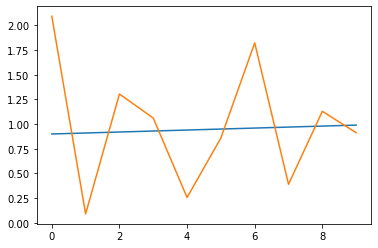

In [33]:

# plot the actual variance
var = [i*0.01 for i in range(0,100)]
pyplot.plot(var[-n_test:])
# plot forecast variance
pyplot.plot(yhat_garch.variance.values[-1, :])
pyplot.show()